In [2]:
!pip install scikit-fuzzy #fcm di sini

import pandas as pd #untuk mengolah data tabel - excel csv
import numpy as np #untuk operasi numerik
import matplotlib.pyplot as plt
import skfuzzy as fuzz #
from sklearn.preprocessing import StandardScaler #machine learning atau data mining
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/febbisena/DataMining/main/mall_customers.csv")
df

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
x = df.iloc[:, 3:].values
x

In [ ]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

In [12]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(x_scaled.T, c=5, m=2, error=0.01, maxiter=100, init=None)

In [13]:
df['Cluster'] = np.argmax(u, axis=0) + 1
df

,customer_id,gender,age,annual_income,spending_score,Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,2
197,198,Male,32,126,74,5
198,199,Male,32,137,18,2


from matplotlib import pyplot as plt
df['customer_id'].plot(kind='hist', bins=20, title='customer_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['annual_income'].plot(kind='hist', bins=20, title='annual_income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['spending_score'].plot(kind='hist', bins=20, title='spending_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='customer_id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='annual_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='annual_income', y='spending_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='spending_score', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['customer_id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('customer_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('customer_id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['customer_id']
  ys = series['spending_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('customer_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('customer_id')
_ = plt.ylabel('spending_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['customer_id']
  ys = series['Cluster']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('customer_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('customer_id')
_ = plt.ylabel('Cluster')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['customer_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'customer_id'}, axis=1)
              .sort_values('customer_id', ascending=True))
  xs = counted['customer_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('customer_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('customer_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['customer_id'].plot(kind='line', figsize=(8, 4), title='customer_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['annual_income'].plot(kind='line', figsize=(8, 4), title='annual_income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['spending_score'].plot(kind='line', figsize=(8, 4), title='spending_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='customer_id', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='annual_income', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='spending_score', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [14]:
df.to_csv('fcm.csv', index=False)

In [16]:
cluster_counts = df['Cluster'].value_counts().sort_index()
for cluster_num, count in cluster_counts.items():
  print(f"Cluster {cluster_num}: {count}")

Cluster 1: 22
Cluster 2: 35
Cluster 3: 23
Cluster 4: 81
Cluster 5: 39


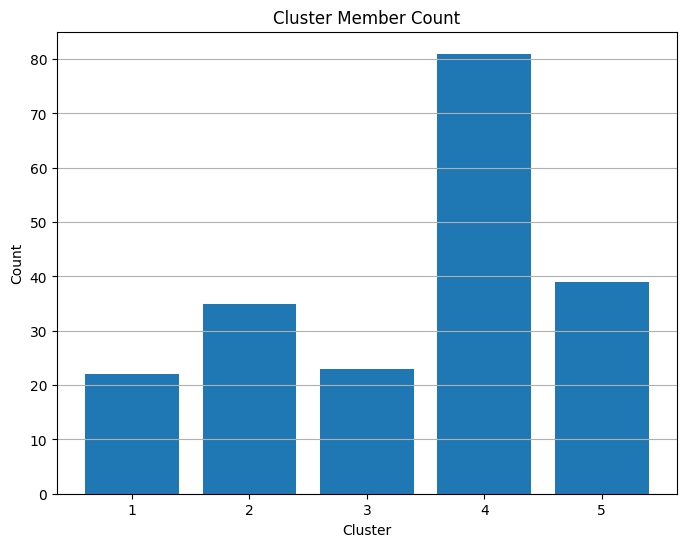

In [17]:
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.title('Cluster Member Count')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(range(1, len(cluster_counts) + 1))
plt.grid(axis='y')
plt.show()

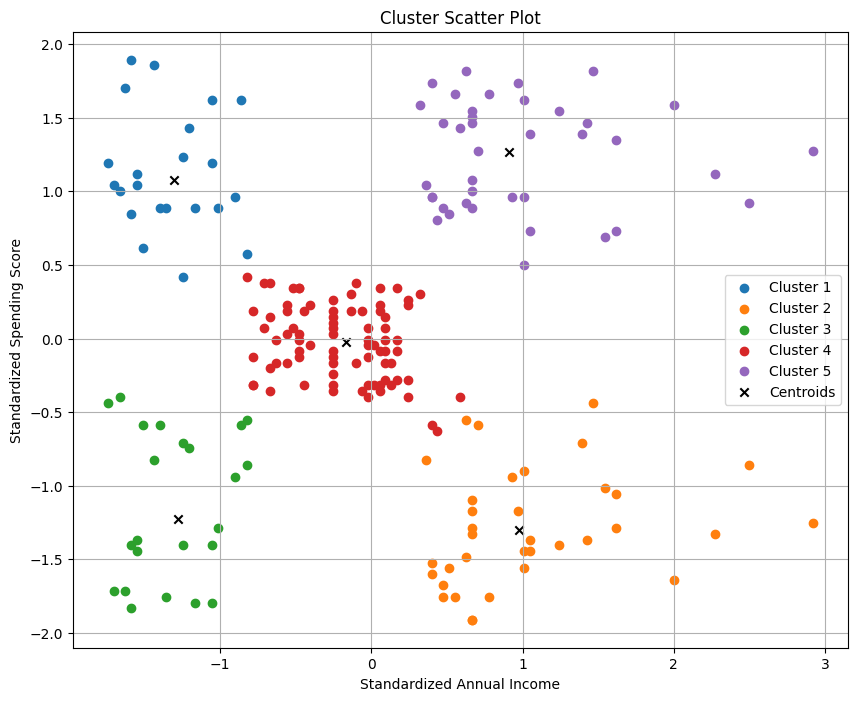

In [18]:
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.scatter(x_scaled[df['Cluster'] == i+1, 0], x_scaled[df['Cluster'] == i+1, 1], label=f'Cluster {i+1}')

plt.scatter(cntr[:, 0], cntr[:, 1], marker='x', color='black', label='Centroids')
plt.title('Cluster Scatter Plot')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
silhouette_avg = silhouette_score(x_scaled, np.argmax(u, axis=0))
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5546571631111091
